### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r'C:\Users\Usha Bharati\Downloads\Chocolate Bar Ratings'

In [4]:
df_cleaned_1=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_cleaned_1.csv'))

In [5]:
df_cleaned_1.shape

(1795, 11)

In [6]:
df_cleaned_1.head()

,Company,Chocolate_origin,Review_number,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin,Cocoa_category,Rating_category
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,6,Sao Tome,Mild Mocha,Fair
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,6,Togo,Moderate Blend,Fair
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,6,Togo,Moderate Blend,Fair
3,A. Morin,Akata,1680,2015,70.0,France,3.50,6,Togo,Moderate Blend,Fair
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,6,Peru,Moderate Blend,Fair


### Removing categorical columns from the data for analysis

In [7]:
df_cluster=df_cleaned_1[['Review_year','Cocoa_percent','Rating']]

In [8]:
df_cluster.isnull().sum()

Review_year      0
Cocoa_percent    0
Rating           0
dtype: int64

### 2.Elbow technique

### Performing standardization on columns 'Cocoa_percent' and 'Rating' as these are two numerical variables with different range and scales. Cocoa percent as evident has range between 0 to 100 in percent whereas rating is given from 1 to 5.

#### Creating new dataframe containing standardized values.

In [9]:
 # Computing mean and standard deviation for each variable
cocoa_percent_mean = np.mean(df_cluster['Cocoa_percent'])
cocoa_percent_std = np.std(df_cluster['Cocoa_percent'])

rating_mean = np.mean(df_cluster['Rating'])
rating_std = np.std(df_cluster['Rating'])

# Standardizing the variables
df_cluster_standardized = pd.DataFrame()
df_cluster_standardized['Cocoa_percent_standardized'] = (df_cluster['Cocoa_percent'] - cocoa_percent_mean) / cocoa_percent_std
df_cluster_standardized['Rating_standardized'] = (df_cluster['Rating'] - rating_mean) / rating_std

In [10]:
df_cluster_standardized

,Cocoa_percent_standardized,Rating_standardized
0,-1.376022,1.180231
1,-0.268665,-0.912129
2,-0.268665,-0.389039
3,-0.268665,0.657141
4,-0.268665,0.657141
...,...,...
1790,-0.268665,1.180231
1791,-1.059635,-0.389039
1792,-1.059635,0.657141
1793,-1.534216,0.134051


In [11]:
# Defining the range of potential clusters in the data.
num_cl=range(1,5)
# Defining k-means clusters in the range assigned above.
kmeans=[KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df_cluster_standardized).score(df_cluster_standardized) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.
score

C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

[-3590.0000000000546,
 -2356.0786534600725,
 -1622.981407868663,
 -1272.82388641191]

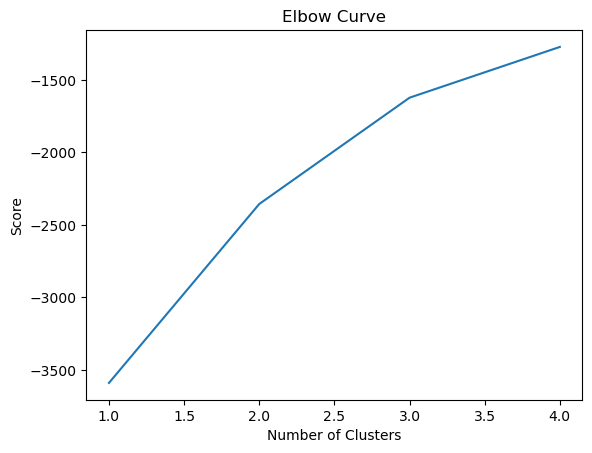

In [13]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster_standardized)

C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# Creating a copy of df_cluster 
df_cluster_final = df_cluster.copy()
df_cluster_final['Clusters'] = kmeans.fit_predict(df_cluster_standardized)



C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [17]:
df_cluster_final

,Review_year,Cocoa_percent,Rating,Clusters
0,2016,63.0,3.75,1
1,2015,70.0,2.75,0
2,2015,70.0,3.00,0
3,2015,70.0,3.50,1
4,2015,70.0,3.50,1
...,...,...,...,...
1790,2011,70.0,3.75,1
1791,2011,65.0,3.00,0
1792,2011,65.0,3.50,1
1793,2011,62.0,3.25,1


In [18]:
df_cluster_final['Clusters'].value_counts()

Clusters
1    954
0    668
2    173
Name: count, dtype: int64

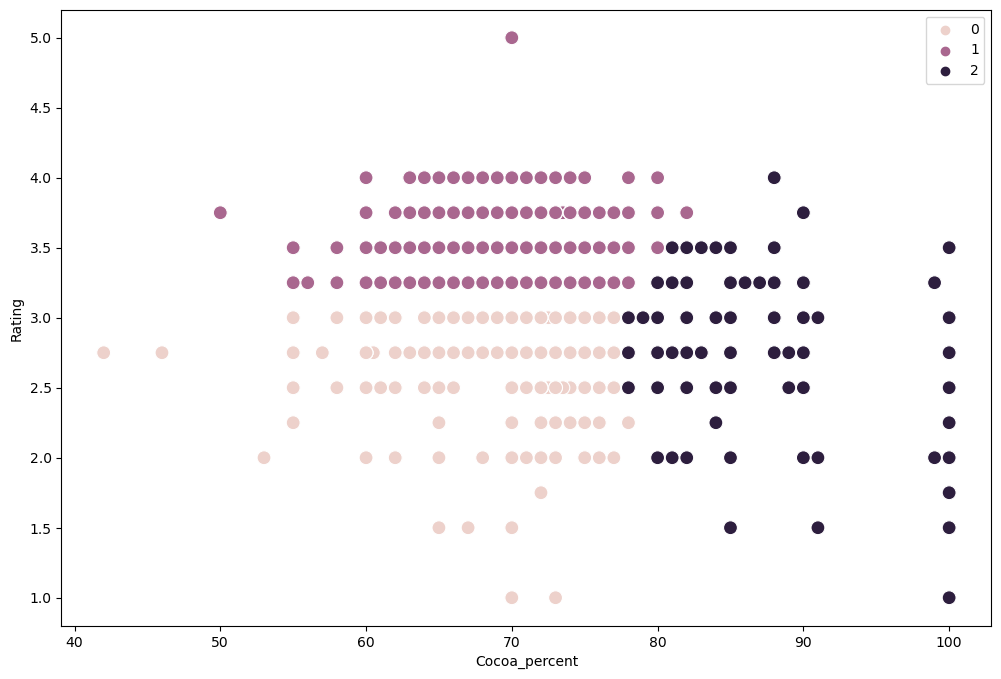

In [28]:
# Plot the clusters for the "Cocoa_percent" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Cocoa_percent'], y=df_cluster['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa_percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

In [31]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))

<Figure size 640x480 with 0 Axes>

#### The data points in '0' cluster have cocoa_percent ranging from 40 to nearly 70 and ratings for these did not cross 3. 
#### Whereas for data points in cluster '1' have cocoa percent between 60 to 80 and ratings are above 3, none of them have ratings below 3 that is something to notice.
#### Lastly, cluster '2' have cocoa percent above 80 and ratings for this category are kind of mixed and they range from 1 to 4.

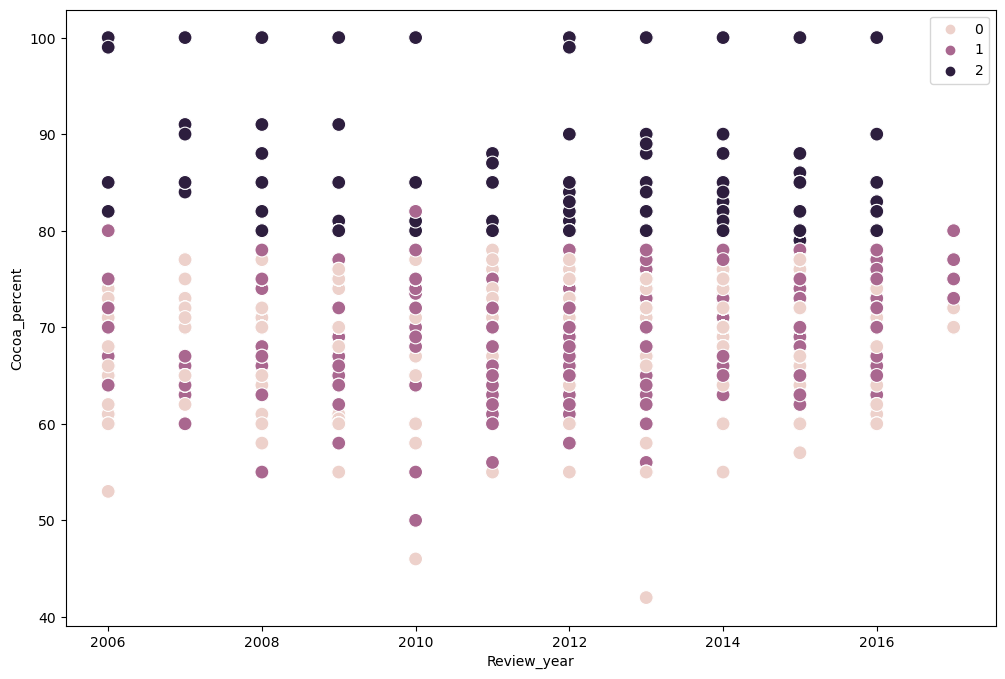

In [21]:
# Plot the clusters for the "Cocoa_percent" and "Reveiw_year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Review_year'], y=df_cluster['Cocoa_percent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review_year') # Label x-axis.
plt.ylabel('Cocoa_percent') # Label y-axis.
plt.show()

#### The data points for all clusters seem to be overlapping over the years. There has been review of chocolate bars with varying cooca percent in all the years. So, this does not seem to be hepful in analysis.

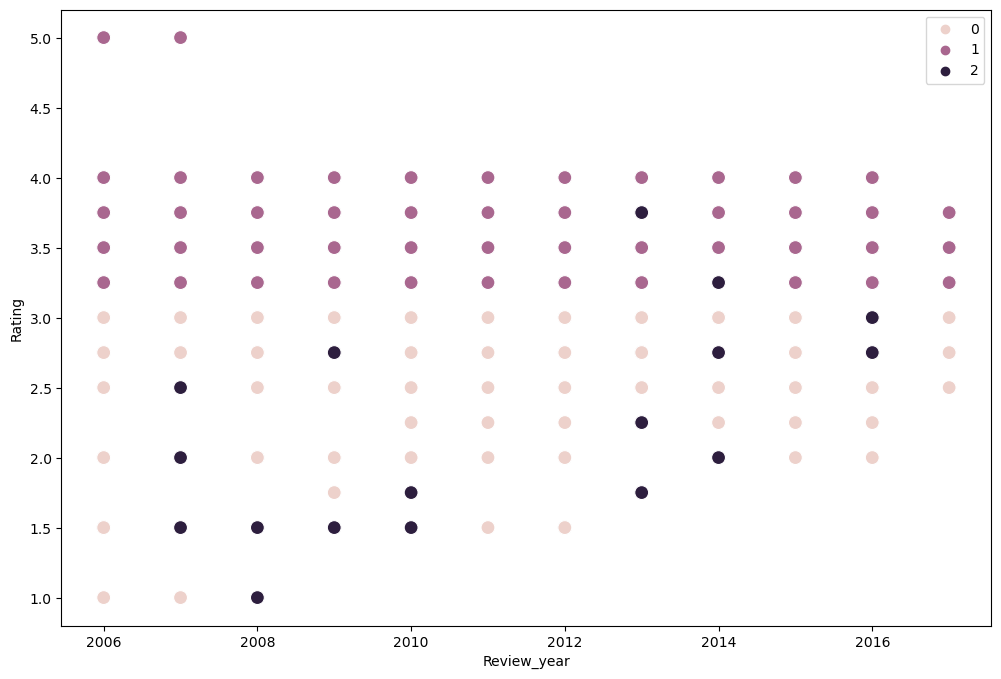

In [22]:
# Plot the clusters for the "Rating" and "Reveiw_year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Review_year'], y=df_cluster['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review_year') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### The above plot shows that there are almost no chocolate bars from 2012 onwards which have ratings below 1.5. There are very few data points with cluster 0 are seen in this plot. But, Cluster 1 and 2 have been reviewed in all the years.

In [23]:
df_cluster_final.loc[df_cluster_final['Clusters'] == 2, 'Clusters'] = 'dark purple'
df_cluster_final.loc[df_cluster_final['Clusters'] == 1, 'Clusters'] = 'purple'
df_cluster_final.loc[df_cluster_final['Clusters'] == 0, 'Clusters'] = 'pink'

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_11372\1683087020.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_cluster_final.loc[df_cluster_final['Clusters'] == 2, 'Clusters'] = 'dark purple'


In [24]:
df_cluster_final.groupby('Clusters').agg({'Cocoa_percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa_percent           Rating       
                     mean median      mean median
Clusters                                         
dark purple     85.098266   83.0  2.848266   3.00
pink            70.037425   70.0  2.771332   2.75
purple          70.431342   70.0  3.537474   3.50

#### "Dark purple" and "purple" clusters have similar mean cocoa percentages, around 70. Dark purple has a slightly higher mean of approximately 70.04, while purple has a mean of around 70.43. On the other hand, the "pink" cluster has a significantly higher mean cocoa percent of approximately 85.10. This suggests that products in the "pink" cluster tend to have a higher cocoa percentage compared to the other clusters.
#### The "purple" cluster has the highest mean and median ratings among the three clusters, with values around 3.54 and 3.50, respectively. This suggests that products in the "purple" cluster tend to have higher ratings compared to the other clusters.
#### There does not seem to be any linear relationship between variables.
#### Further exploration of categorical variables may be helpful to identify the relation in this dataset.

In [25]:
df_cluster_final.to_csv(os.path.join(path,'02 Data','Prepared Data','df_cluster_final.csv'))